# About Food Demand Forecasting Challenge

* Demand forecasting is a key component to every growing online business. Without proper demand forecasting processes in     place, it can be nearly impossible to have the right amount of stock on hand at any given time. A food delivery service     has to deal with a lot of perishable raw materials which makes it all the more important for such a company to accurately   forecast daily and weekly demand.

* Too much inventory in the warehouse means more risk of wastage, and not enough could lead to out-of-stocks — and push       customers to seek solutions from your competitors. In this challenge, get a taste of demand forecasting challenge using a    real dataset.

# Problem Statement

* Your client is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these    cities for dispatching meal orders to their customers. The client wants you to help these centers with demand               forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

* The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the        procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand    forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks       (Weeks: 146-155) for the center-meal combinations in the test set:  

* Historical data of demand for a product-center combination (Weeks: 1 to 145)
* Product(Meal) features such as category, sub-category, current price and discount
* Information for fulfillment center like center area, city information etc.

## Evaluation Metric
* The evaluation metric for this competition is 100*RMSLE where RMSLE is Root of Mean Squared Logarithmic Error across all    entries in the test set.

# Load Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Reading data

In [5]:
train = pd.read_csv(r"D:\case_studies(eda)\food demand forecasting\train.csv")
display(train.head())
train.shape

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


(456548, 9)

In [6]:
test = pd.read_csv(r"D:\case_studies(eda)\food demand forecasting\test_QoiMO9B.csv")
display(test.head())
test.shape

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


(32573, 8)

In [7]:
submission = pd.read_csv(r"D:\case_studies(eda)\food demand forecasting\sample_submission_hSlSoT6.csv")
display(submission.head())
submission.shape

,id,num_orders
0,1028232,0
1,1127204,0
2,1212707,0
3,1082698,0
4,1400926,0


(32573, 2)

In [8]:
centre = pd.read_csv(r"D:\case_studies(eda)\food demand forecasting\fulfilment_center_info.csv")
display(centre.head())
centre.shape

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


(77, 5)

In [9]:
meal = pd.read_csv(r"D:\case_studies(eda)\food demand forecasting\meal_info.csv")
display(meal.head())
meal.shape

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


(51, 3)

### Combining all the files that will be used for training

In [10]:
combined = pd.concat([train, test], ignore_index = True)

In [11]:
combined.shape, train.shape, test.shape

((489121, 9), (456548, 9), (32573, 8))

In [12]:
combined.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177.0
1,1466964,1,55,1993,136.83,135.83,0,0,270.0
2,1346989,1,55,2539,134.86,135.86,0,0,189.0
3,1338232,1,55,2139,339.50,437.53,0,0,54.0
4,1448490,1,55,2631,243.50,242.50,0,0,40.0


## Merging combined data with centre data on the basis of center_id

In [13]:
combined = pd.merge(combined, centre, on = ['center_id'], how = 'left')    # Using .merge to combine datasets

## Merging combined data with meal data on the basis of meal_id

In [14]:
combined = pd.merge(combined, meal, on = ['meal_id'], how = 'left')         # Using .merge to combine datasets

In [15]:
# Checking shape of the dataset

combined.shape  

(489121, 15)

## Let's preview our data

In [16]:
combined.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189.0,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54.0,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40.0,647,56,TYPE_C,2.0,Beverages,Indian


## Cheking info of our data

In [17]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489121 entries, 0 to 489120
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     489121 non-null  int64  
 1   week                   489121 non-null  int64  
 2   center_id              489121 non-null  int64  
 3   meal_id                489121 non-null  int64  
 4   checkout_price         489121 non-null  float64
 5   base_price             489121 non-null  float64
 6   emailer_for_promotion  489121 non-null  int64  
 7   homepage_featured      489121 non-null  int64  
 8   num_orders             456548 non-null  float64
 9   city_code              489121 non-null  int64  
 10  region_code            489121 non-null  int64  
 11  center_type            489121 non-null  object 
 12  op_area                489121 non-null  float64
 13  category               489121 non-null  object 
 14  cuisine                489121 non-nu

## Checking for missing values

In [18]:
combined.isnull().sum()

id                           0
week                         0
center_id                    0
meal_id                      0
checkout_price               0
base_price                   0
emailer_for_promotion        0
homepage_featured            0
num_orders               32573
city_code                    0
region_code                  0
center_type                  0
op_area                      0
category                     0
cuisine                      0
dtype: int64

## Inferences
* our dataset contains no missing values

## Seperating numerical and categorical columns

In [19]:
num_cols = combined.select_dtypes(include = np.number).columns
cat_cols = combined.select_dtypes(include = 'object').columns

In [20]:
len(num_cols), len(cat_cols)

(12, 3)

In [21]:
num_cols

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'op_area'],
      dtype='object')

In [22]:
cat_cols

Index(['center_type', 'category', 'cuisine'], dtype='object')

# Univariate Analysis

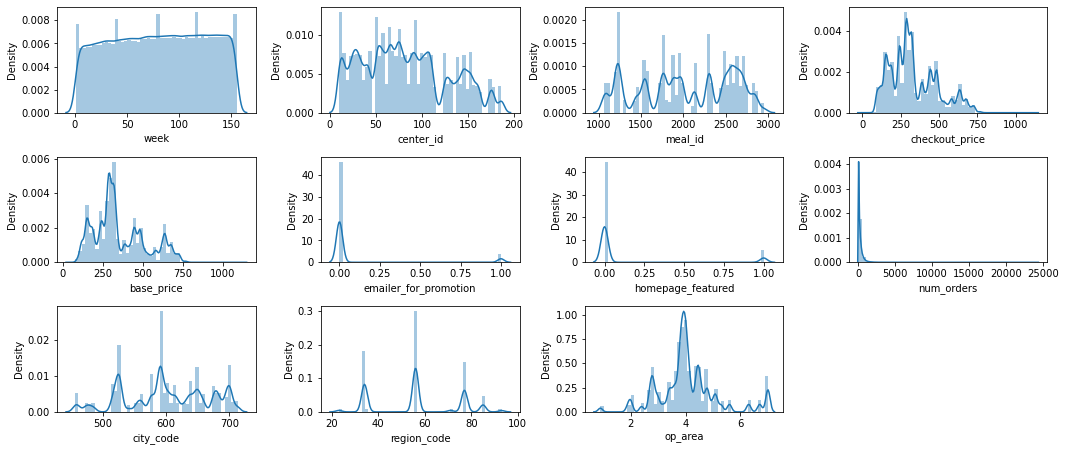

In [23]:
#Ploting all the numerical columns :-

num_cols = num_cols = ['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'op_area']

nrows = 4
ncols = 4
repeater = 1

plt.figure(figsize = (15, 8))
for i in num_cols:
    plt.subplot(nrows, ncols, repeater)
    sns.distplot(combined.loc[:, i])
    repeater+=1
plt.tight_layout()
plt.show()

## Inferences
* Base price is high between 250 to 350, so we can say that meals of this price are ordered more.
* checkout_price is high between 250 to 400.
* Features like 'emailer_for_promotion', 'homepage_featured','num_orders' are highly right skewed.
* Majority of orders recieved are from city_code between 580 to 600 and region_code 58.

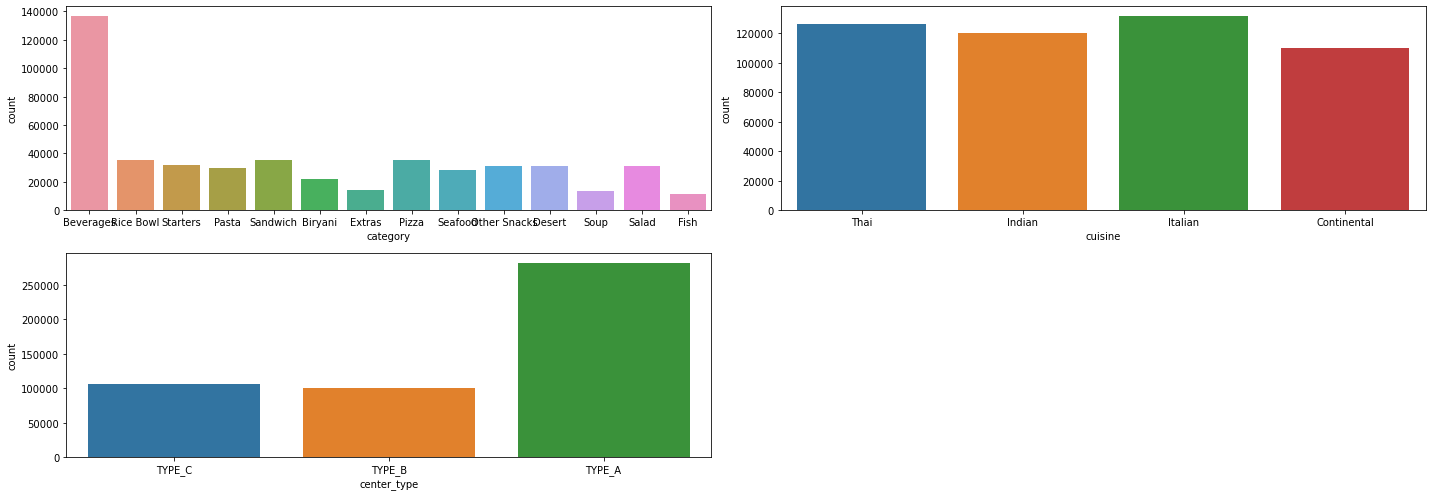

In [24]:
#Ploting all the categorical columns :-

cat_cols = ['category', 'cuisine', 'center_type']

nrows = 3
ncols = 2
repeater = 1

plt.figure(figsize = (20, 10))
for i in cat_cols:
    plt.subplot(nrows, ncols, repeater)
    sns.countplot(combined.loc[:, i])
    repeater+=1
plt.tight_layout()
plt.show()

## Inferences
* Beverages are mostly ordered items among all. 
* Italian cuisine is ordered more.
* Type_A center_type recives highest orders.

## Bivariate Analysis

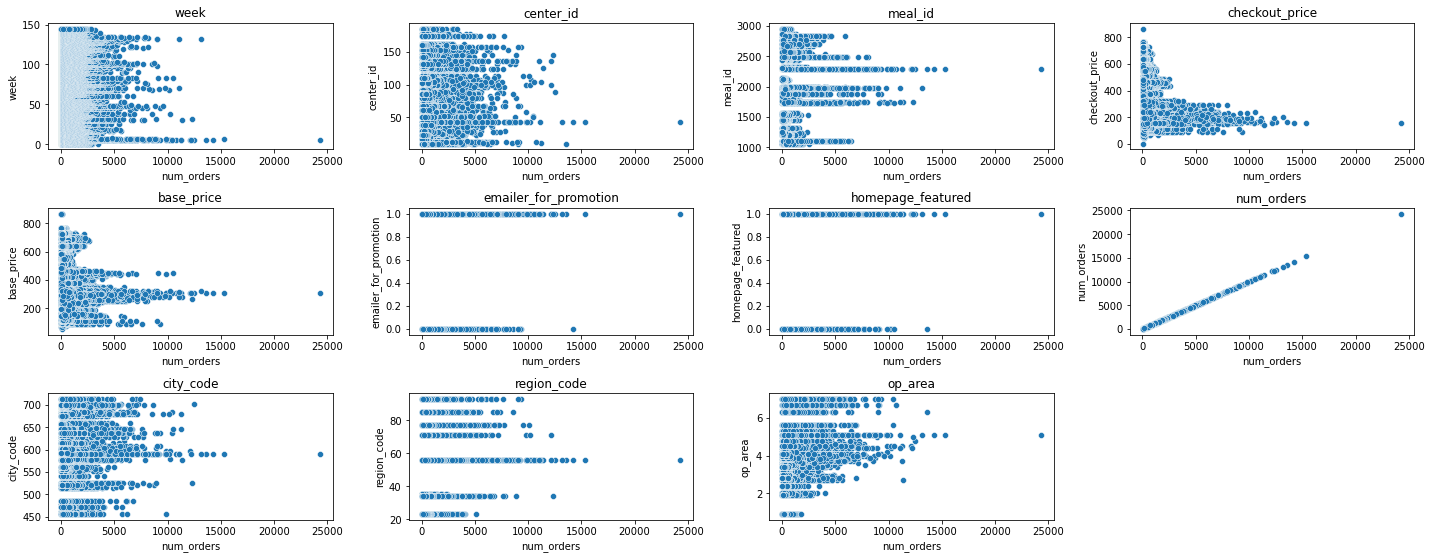

In [25]:
# Numerical vs Numerical(Target) columns  :-

num_cols = ['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'op_area']

nrows = 4
ncols = 4
iterator = 1

plt.figure(figsize = (20, 10))

for i in num_cols:
        plt.subplot(nrows, ncols,iterator)
        sns.scatterplot(combined.num_orders, combined.loc[:,i])
        plt.title(i)
        iterator = iterator +1
                
plt.tight_layout()
plt.show()

## Inferences 
we are not getting as such pattern here

In [26]:
num_cols

['week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'num_orders',
 'city_code',
 'region_code',
 'op_area']

In [27]:
cat_cols

['category', 'cuisine', 'center_type']

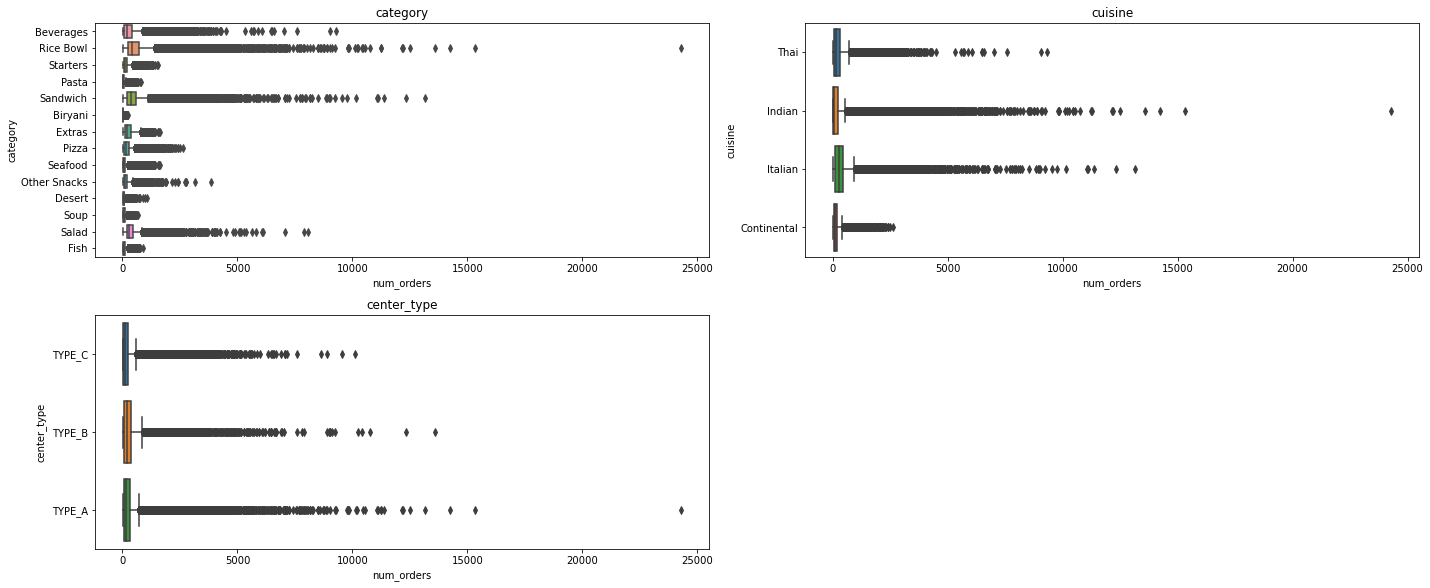

In [28]:
# Categorical vs Numerical(Target) columns :-

cat_cols = ['category', 'cuisine', 'center_type']

nrows = 5
ncols = 2
iterator = 1

plt.figure(figsize = (20, 20))

for i in cat_cols:
        plt.subplot(nrows, ncols,iterator)
        sns.boxplot(combined.num_orders, combined.loc[:,i])
        plt.title(i)
        iterator = iterator +1
                
plt.tight_layout()
plt.show()

# Infernces 
* Most people prefer Ricebowl, sandwich salad and beverages
* Most people prefer indian food over the other cuisine


# Feature Engineering

### 1. Difference in check out and base price

In [29]:
combined['diff_in_price'] = np.abs(combined['base_price'] - combined['checkout_price'])

### 2. Checking proportion between difference in price and checkout price

In [30]:
combined['prop'] = combined.diff_in_price/combined.checkout_price

In [31]:
combined.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,diff_in_price,prop
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,647,56,TYPE_C,2.0,Beverages,Thai,15.46,0.112987
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,647,56,TYPE_C,2.0,Beverages,Thai,1.00,0.007308
2,1346989,1,55,2539,134.86,135.86,0,0,189.0,647,56,TYPE_C,2.0,Beverages,Thai,1.00,0.007415
3,1338232,1,55,2139,339.50,437.53,0,0,54.0,647,56,TYPE_C,2.0,Beverages,Indian,98.03,0.288748
4,1448490,1,55,2631,243.50,242.50,0,0,40.0,647,56,TYPE_C,2.0,Beverages,Indian,1.00,0.004107


In [32]:
combined.shape

(489121, 17)

### 3. Combining emailer_for_promotion and homepage_featured because they both individual are giving good pattern, so we will see if they both together give a good pattern or not

In [33]:
combined['social_media'] = combined.emailer_for_promotion + combined.homepage_featured

<AxesSubplot:xlabel='social_media', ylabel='num_orders'>

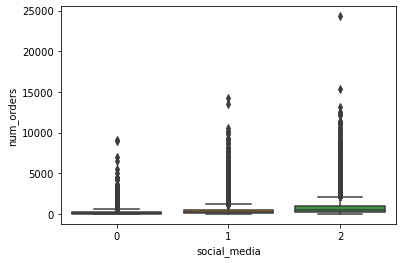

In [34]:
sns.boxplot(combined.social_media, combined.num_orders)

### 4. combining city code and region

In [35]:
combined['region'] = combined.city_code.astype('str')+"_"+combined.region_code.astype('str')

<AxesSubplot:xlabel='region', ylabel='num_orders'>

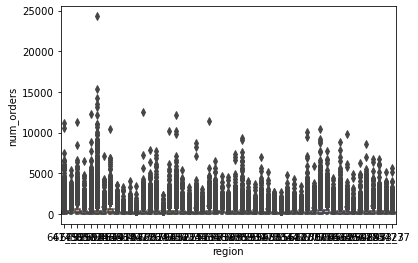

In [36]:
sns.boxplot(combined.region, combined.num_orders)

## 5. Count of city basis region

In [37]:
combined['count_city_region'] = combined.groupby('region_code')['city_code'].transform('nunique')

## 6. Count of orders basis region

In [38]:
combined['count_orders_region'] = combined.groupby('region_code')['meal_id'].transform('nunique')

In [39]:
combined.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,center_type,op_area,category,cuisine,diff_in_price,prop,social_media,region,count_city_region,count_orders_region
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,647,...,TYPE_C,2.0,Beverages,Thai,15.46,0.112987,0,647_56,16,51
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,647,...,TYPE_C,2.0,Beverages,Thai,1.00,0.007308,0,647_56,16,51
2,1346989,1,55,2539,134.86,135.86,0,0,189.0,647,...,TYPE_C,2.0,Beverages,Thai,1.00,0.007415,0,647_56,16,51
3,1338232,1,55,2139,339.50,437.53,0,0,54.0,647,...,TYPE_C,2.0,Beverages,Indian,98.03,0.288748,0,647_56,16,51
4,1448490,1,55,2631,243.50,242.50,0,0,40.0,647,...,TYPE_C,2.0,Beverages,Indian,1.00,0.004107,0,647_56,16,51


### 7. Count of cities basis centre type

In [40]:
combined['count_city_centre'] = combined.groupby('center_type')['city_code'].transform('nunique')

### 8.  Relation between cusine and meal_id

In [41]:
combined.groupby('center_type')['city_code'].transform('nunique')

0         13
1         13
2         13
3         13
4         13
          ..
489116    36
489117    36
489118    36
489119    36
489120    36
Name: city_code, Length: 489121, dtype: int64

### 9. City wise count of meals

In [42]:
combined['count_city_oders'] = combined.groupby('city_code')['meal_id'].transform('nunique')

### City wise avg, median and standard deviation of meals

In [43]:
### 10. Average city order

combined['Avg_city_oders'] = combined.groupby('city_code')['meal_id'].transform('mean')

### 11. Median city order

combined['median_city_oders'] = combined.groupby('city_code')['meal_id'].transform('median')

### 12. Std city order

combined['std_city_oders'] = combined.groupby('city_code')['meal_id'].transform('std')

### Region wise avg, median and standard deviation of meals

In [44]:
### 13. Avg order count region wise 

combined['Avg_oders_region'] = combined.groupby('region_code')['meal_id'].transform('mean')

### 14. order count region wise

combined['median_oders_region'] = combined.groupby('region_code')['meal_id'].transform('median')

### 15. Std order count region wise

combined['std_oders_region'] = combined.groupby('region_code')['meal_id'].transform('std')

### Category wise avg, median and standard deviation of number of orders

In [45]:
### 16. Category wise number of orders

combined['count_order_cat'] = combined.groupby('category')['meal_id'].transform('nunique')

### 17. Category wise Avg of orders

combined['Avg_order_cat'] = combined.groupby('category')['meal_id'].transform('mean')

### 18. Category wise median of orders

combined['median_order_cat'] = combined.groupby('category')['meal_id'].transform('median')

### 19. Category wise std of orders

combined['std_order_cat'] = combined.groupby('category')['meal_id'].transform('std')

### Cuisine wise avg, median and standard deviation of number of orders

In [46]:
### 20. Cuisine wise count of orders 

combined['count_order_cuisine'] = combined.groupby('cuisine')['meal_id'].transform('nunique')

### 21. Cuisine wise mean of orders 

combined['mean_order_cuisine'] = combined.groupby('cuisine')['meal_id'].transform('mean')


### 22. Cuisine wise median of orders 

combined['median_order_cuisine'] = combined.groupby('cuisine')['meal_id'].transform('median')


### 23. Cuisine wise std of orders 

combined['std_order_cuisine'] = combined.groupby('cuisine')['meal_id'].transform('std')



In [47]:
pd.set_option('display.max_columns', 50)  # checking all the columns
combined.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,diff_in_price,prop,social_media,region,count_city_region,count_orders_region,count_city_centre,count_city_oders,Avg_city_oders,median_city_oders,std_city_oders,Avg_oders_region,median_oders_region,std_oders_region,count_order_cat,Avg_order_cat,median_order_cat,std_order_cat,count_order_cuisine,mean_order_cuisine,median_order_cuisine,std_order_cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,647,56,TYPE_C,2.0,Beverages,Thai,15.46,0.112987,0,647_56,16,51,13,50,2005.521434,1971.0,556.977988,2004.850545,1971.0,550.071391,12,1893.081524,1885.0,572.193659,15,2139.650927,1993.0,493.723836
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,647,56,TYPE_C,2.0,Beverages,Thai,1.00,0.007308,0,647_56,16,51,13,50,2005.521434,1971.0,556.977988,2004.850545,1971.0,550.071391,12,1893.081524,1885.0,572.193659,15,2139.650927,1993.0,493.723836
2,1346989,1,55,2539,134.86,135.86,0,0,189.0,647,56,TYPE_C,2.0,Beverages,Thai,1.00,0.007415,0,647_56,16,51,13,50,2005.521434,1971.0,556.977988,2004.850545,1971.0,550.071391,12,1893.081524,1885.0,572.193659,15,2139.650927,1993.0,493.723836
3,1338232,1,55,2139,339.50,437.53,0,0,54.0,647,56,TYPE_C,2.0,Beverages,Indian,98.03,0.288748,0,647_56,16,51,13,50,2005.521434,1971.0,556.977988,2004.850545,1971.0,550.071391,12,1893.081524,1885.0,572.193659,12,1875.408150,1902.0,503.578350
4,1448490,1,55,2631,243.50,242.50,0,0,40.0,647,56,TYPE_C,2.0,Beverages,Indian,1.00,0.004107,0,647_56,16,51,13,50,2005.521434,1971.0,556.977988,2004.850545,1971.0,550.071391,12,1893.081524,1885.0,572.193659,12,1875.408150,1902.0,503.578350


# Let's check the correlation

In [48]:
combined.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine',
       'diff_in_price', 'prop', 'social_media', 'region', 'count_city_region',
       'count_orders_region', 'count_city_centre', 'count_city_oders',
       'Avg_city_oders', 'median_city_oders', 'std_city_oders',
       'Avg_oders_region', 'median_oders_region', 'std_oders_region',
       'count_order_cat', 'Avg_order_cat', 'median_order_cat', 'std_order_cat',
       'count_order_cuisine', 'mean_order_cuisine', 'median_order_cuisine',
       'std_order_cuisine'],
      dtype='object')

In [49]:
# Seperating columns that should be numerical 

numerical_cols = ['checkout_price', 'base_price', 'diff_in_price', 'num_orders', 'count_city_region',
       'count_orders_region', 'count_city_centre', 'count_city_oders',
       'Avg_oders_region', 'median_oders_region', 'std_oders_region',
       'count_order_cat', 'Avg_order_cat', 'median_order_cat', 'std_order_cat',
       'count_order_cuisine', 'mean_order_cuisine', 'median_order_cuisine',
       'std_order_cuisine']

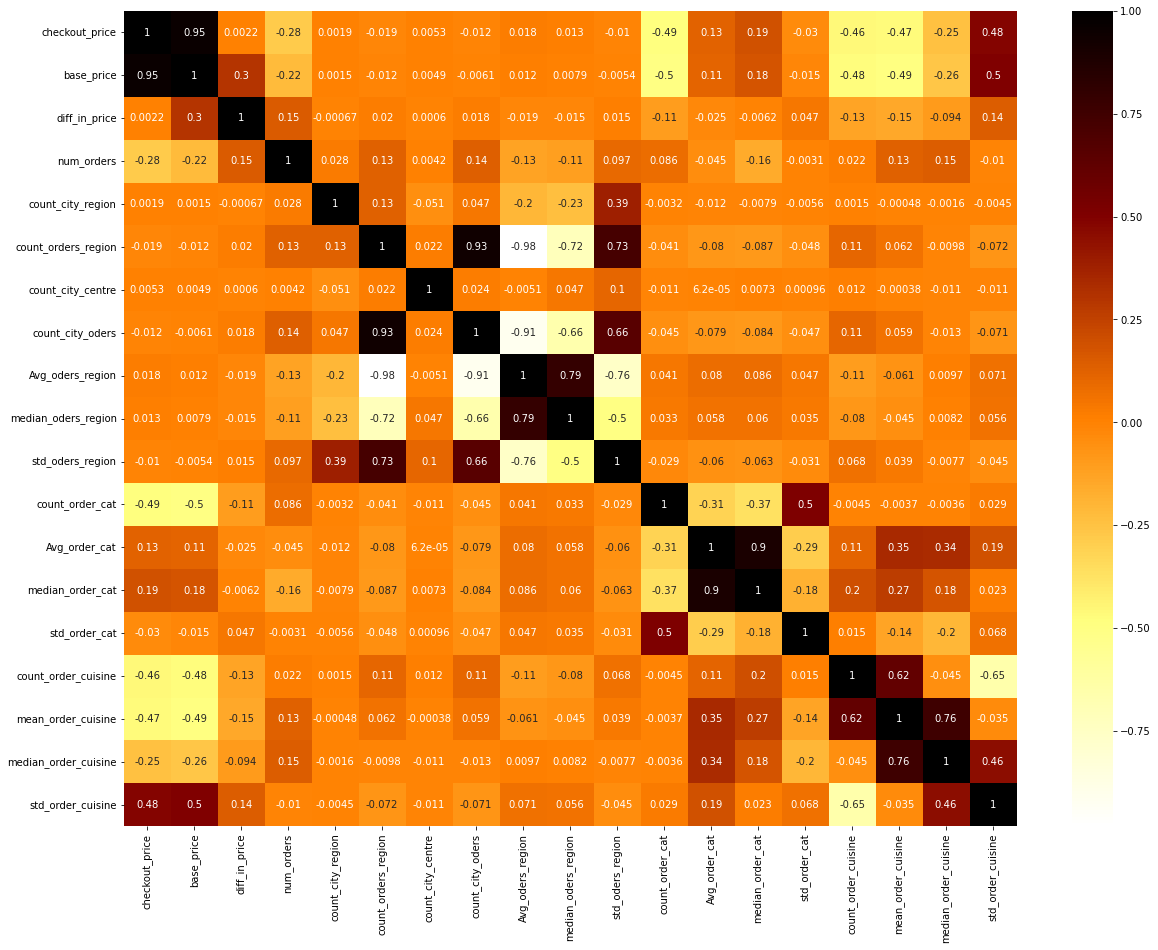

In [50]:
plt.figure(figsize = (20,15))
sns.heatmap(combined.loc[:, numerical_cols].corr(), annot = True, cmap = 'afmhot_r')
plt.show()

# Inferences
* All the columns having dark shades have a good relation with target

In [51]:
### 24. Average order per week

combined['count_order_'] = combined.groupby('week')['meal_id'].transform('mean')

In [52]:
combined.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine',
       'diff_in_price', 'prop', 'social_media', 'region', 'count_city_region',
       'count_orders_region', 'count_city_centre', 'count_city_oders',
       'Avg_city_oders', 'median_city_oders', 'std_city_oders',
       'Avg_oders_region', 'median_oders_region', 'std_oders_region',
       'count_order_cat', 'Avg_order_cat', 'median_order_cat', 'std_order_cat',
       'count_order_cuisine', 'mean_order_cuisine', 'median_order_cuisine',
       'std_order_cuisine', 'count_order_'],
      dtype='object')

## Dropping unnecessary columns

In [53]:
new = combined.drop(['id', 'center_id', 'meal_id',  'city_code', 'region_code', 'emailer_for_promotion',
                     'homepage_featured'], axis = 1)

In [54]:
# Factorize the cat variable

new['cuisine'] = pd.factorize(new.cuisine)[0]
new['center_type'] = pd.factorize(new.center_type)[0]
new['category'] = pd.factorize(new.category)[0]
new['op_area'] = pd.factorize(new.op_area)[0]
new['region'] = pd.factorize(new.region)[0]

## Let's split the data in train and test

# Outliers Treatment
* Note :- We will make two models one with outlier and one without outliers and check the performance

In [55]:
# Split the Data in Train and Test ~ With Outliers

with_outliers_train = new.loc[0:train.shape[0]-1,]
with_outliers_test = new.loc[train.shape[0]:,]

X_outliers = with_outliers_train.drop('num_orders', axis = 1)
with_outliers_test = with_outliers_test.drop('num_orders', axis = 1)

y = with_outliers_train.num_orders

In [58]:
# Reset the Index in the Test Set

with_outliers_test = with_outliers_test.reset_index().drop("index", axis = 1)

## Modelling

In [59]:
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

xgb = XGBRegressor()
lgbm = LGBMRegressor()

cv = KFold(n_splits = 5, random_state = 42, shuffle = True)

pred = []
pred_lgbm = []
for train_index, test_index in cv.split(X_outliers, y):
    xtrain = X_outliers.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(xgb.fit(xtrain, ytrain).predict(with_outliers_test))
    pred_lgbm.append(lgbm.fit(xtrain, ytrain).predict(with_outliers_test))

In [ ]:
# Submission

submission["num_orders"] =  np.abs(pd.DataFrame(pred_lgbm).T.mean(axis = 1))
submission.to_csv("LGBModel.csv", index = False) 

# Score after submission with xgb and then with LGBM :-

# XGB: 70.98017412305778 
# LGBM: 75.98017412305778

## Without outlier

In [60]:
# Using iqr method to remove outliers

q1 = np.quantile(with_outliers_train, 0.25)
q2 = np.quantile(with_outliers_train, 0.50)
q3 = np.quantile(with_outliers_train, 0.75)

iqr = q3 - q1

lower_lim = q1 - 1.5*iqr
upper_lim = q3 + 1.5*iqr

wt_outliers = with_outliers_train.loc[~((with_outliers_train<lower_lim)|(with_outliers_train>upper_lim)).any(axis = 1)]

In [61]:
# Split the Data in Train and Test ~ Without Outliers

X_outliers = wt_outliers.drop("num_orders", axis = 1)
y = wt_outliers.num_orders

In [62]:
# Modelling 

xgb = XGBRegressor()
lgbm = LGBMRegressor()

cv = KFold(n_splits = 5, random_state = 42, shuffle = True)

pred = []
pred_lgbm = []
for train_index, test_index in cv.split(X_outliers, y):
    xtrain = X_outliers.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred.append(xgb.fit(xtrain, ytrain).predict(with_outliers_test))
    pred_lgbm.append(lgbm.fit(xtrain, ytrain).predict(with_outliers_test))

In [ ]:
# Submission

submission["num_orders"] =  np.abs(pd.DataFrame(pred_lgbm).T.mean(axis = 1))
submission.to_csv("LGB_OutlierModel.csv", index = False) 

# Score after submission with xgb and then with LGBM :-

# XGB: 71 
# LGBM: 73